<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/packaging_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packaging Line analysis

## Importing necessary packages

In [ ]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021-02-24_packaging_kveld.xlsx to 2021-02-24_packaging_kveld.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['2021-02-24_packaging_kveld.xlsx']))

In [ ]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Event    23 non-null     int64         
 1   Machine  23 non-null     object        
 2   Start    23 non-null     datetime64[ns]
 3   Stop     23 non-null     datetime64[ns]
 4   Min      23 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [ ]:
df.head()

,Event,Machine,Start,Stop,Min
0,1,PKM3,2021-02-24 15:29:27.633,2021-02-24 15:29:47.183,0.325833
1,2,PKM3,2021-02-24 15:32:34.416,2021-02-24 15:33:26.370,0.865900
2,3,PKM3,2021-02-24 15:34:18.771,2021-02-24 15:36:46.268,2.458283
3,4,PKM3,2021-02-24 15:36:59.021,2021-02-24 15:40:00.305,3.021400
4,5,PKM2,2021-02-24 16:03:32.321,2021-02-24 16:04:28.094,0.929550


## Packaging stoppages EDA

In [ ]:
#Creating a new dataframe and computing the minute and hour column based on a condition
pkl = df.copy()
pkl = pkl.assign(Minute = lambda y: y['Start'].dt.minute, Hour = lambda z: z['Start'].dt.hour)
pkl = pkl.assign(Half_hours = lambda x: np.where(x['Minute'] < 30, x['Start'].dt.hour, x['Start'].dt.hour + 0.5)) #=> Critical to use np.where()
pkl.head(10)

,Event,Machine,Start,Stop,Min,Minute,Hour,Half_hours
0,1,PKM3,2021-02-24 15:29:27.633,2021-02-24 15:29:47.183,0.325833,29,15,15.0
1,2,PKM3,2021-02-24 15:32:34.416,2021-02-24 15:33:26.370,0.865900,32,15,15.5
2,3,PKM3,2021-02-24 15:34:18.771,2021-02-24 15:36:46.268,2.458283,34,15,15.5
3,4,PKM3,2021-02-24 15:36:59.021,2021-02-24 15:40:00.305,3.021400,36,15,15.5
4,5,PKM2,2021-02-24 16:03:32.321,2021-02-24 16:04:28.094,0.929550,3,16,16.0
5,6,PKM2,2021-02-24 16:22:24.802,2021-02-24 16:24:15.705,1.848383,22,16,16.0
6,7,PKM3,2021-02-24 16:27:39.127,2021-02-24 16:28:35.235,0.935133,27,16,16.0
7,8,PKM3,2021-02-24 16:38:58.645,2021-02-24 16:39:11.550,0.215083,38,16,16.5
8,9,PKM2,2021-02-24 16:44:50.897,2021-02-24 16:46:51.395,2.008300,44,16,16.5
9,10,PKM3,2021-02-24 16:44:51.679,2021-02-24 16:46:53.709,2.033833,44,16,16.5


In [ ]:
#Dividing the time loss by 2 for each packaging machine to calculate the GE loss
pkl = pkl.assign(Min = pkl['Min']/2)
pkl.head(10)

,Event,Machine,Start,Stop,Min,Minute,Hour,Half_hours
0,1,PKM3,2021-02-24 15:29:27.633,2021-02-24 15:29:47.183,0.162917,29,15,15.0
1,2,PKM3,2021-02-24 15:32:34.416,2021-02-24 15:33:26.370,0.432950,32,15,15.5
2,3,PKM3,2021-02-24 15:34:18.771,2021-02-24 15:36:46.268,1.229142,34,15,15.5
3,4,PKM3,2021-02-24 15:36:59.021,2021-02-24 15:40:00.305,1.510700,36,15,15.5
4,5,PKM2,2021-02-24 16:03:32.321,2021-02-24 16:04:28.094,0.464775,3,16,16.0
5,6,PKM2,2021-02-24 16:22:24.802,2021-02-24 16:24:15.705,0.924192,22,16,16.0
6,7,PKM3,2021-02-24 16:27:39.127,2021-02-24 16:28:35.235,0.467567,27,16,16.0
7,8,PKM3,2021-02-24 16:38:58.645,2021-02-24 16:39:11.550,0.107542,38,16,16.5
8,9,PKM2,2021-02-24 16:44:50.897,2021-02-24 16:46:51.395,1.004150,44,16,16.5
9,10,PKM3,2021-02-24 16:44:51.679,2021-02-24 16:46:53.709,1.016917,44,16,16.5


In [ ]:
#Grouping by events by minute and hour
evn = pkl.copy()
evn = evn.groupby(['Event', 'Start','Hour', 'Minute', 'Half_hours', 'Machine', 'Min']).count()['Stop'].reset_index()
evn = evn.assign(Cum_min = lambda y: y['Min'].cumsum())
evn = evn.assign(Cum_GE = lambda z: z['Cum_min']/12)
evn.tail(10)

,Event,Start,Hour,Minute,Half_hours,Machine,Min,Stop,Cum_min,Cum_GE
13,14,2021-02-24 16:56:12.158,16,56,16.5,PKM3,3.303300,1,15.609742,1.300812
14,15,2021-02-24 17:09:53.381,17,9,17.0,PKM3,1.945133,1,17.554875,1.462906
15,16,2021-02-24 17:10:23.841,17,10,17.0,PKM2,0.190367,1,17.745242,1.478770
16,17,2021-02-24 17:41:47.318,17,41,17.5,PKM3,1.928892,1,19.674133,1.639511
17,18,2021-02-24 17:42:47.850,17,42,17.5,PKM2,1.236475,1,20.910608,1.742551
18,19,2021-02-24 17:58:30.822,17,58,17.5,PKM2,3.358667,1,24.269275,2.022440
19,20,2021-02-24 18:38:36.739,18,38,18.5,PKM3,0.787975,1,25.057250,2.088104
20,21,2021-02-24 19:00:36.383,19,0,19.0,PKM3,1.592558,1,26.649808,2.220817
21,22,2021-02-24 19:21:35.518,19,21,19.0,PKM3,3.296392,1,29.946200,2.495517
22,23,2021-02-24 19:24:00.289,19,24,19.0,PKM2,2.110750,1,32.056950,2.671413


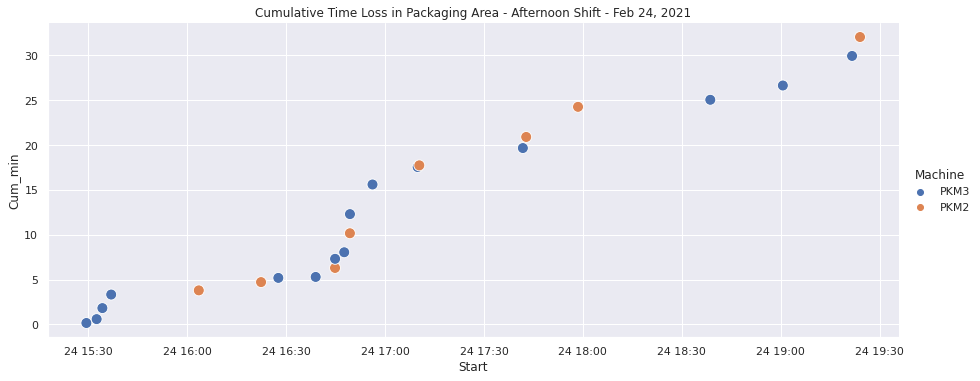

In [ ]:
#Plotting the number of minutes lost by machine and time
sns.relplot(x='Start', y='Cum_min', data=evn, hue='Machine', height=5, aspect=2.5, s=120)
plt.title('Cumulative Time Loss in Packaging Area - Afternoon Shift - Feb 24, 2021')
plt.yticks(np.arange(0, 35, 5))
plt.show()

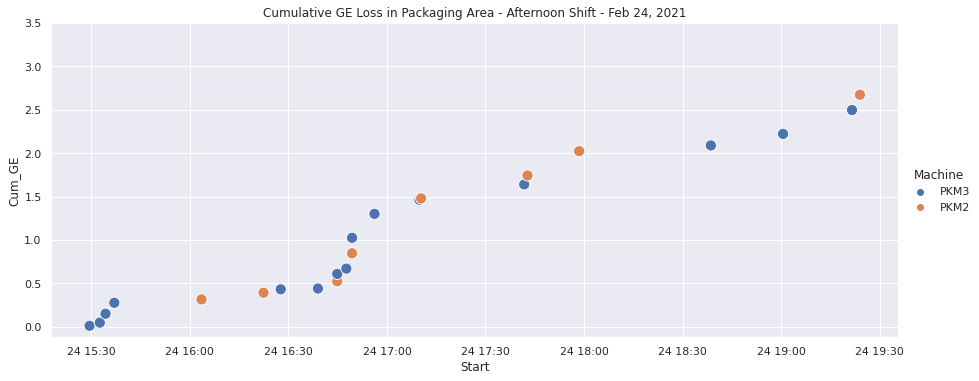

In [ ]:
#Plotting the GE loss by Machine
sns.relplot(x='Start', y='Cum_GE', data=evn, hue='Machine', height=5, aspect=2.5, s=125)
plt.title('Cumulative GE Loss in Packaging Area - Afternoon Shift - Feb 24, 2021')
plt.yticks(np.arange(0, 4, 0.5))
plt.show()

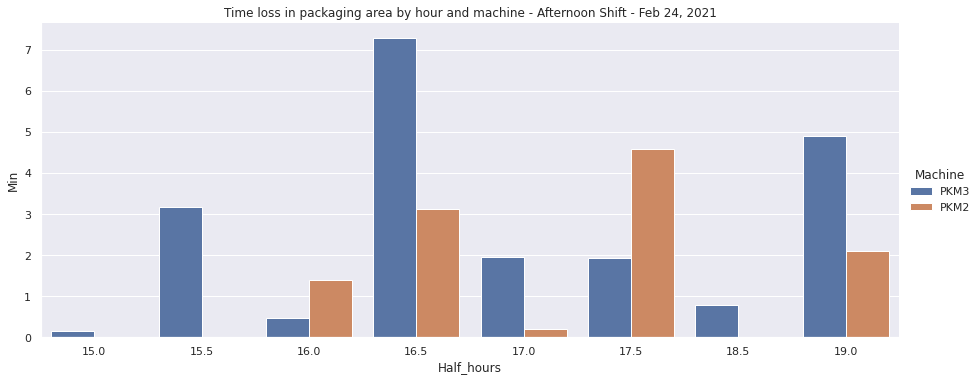

In [ ]:
#Plotting the number of minutes lost by each hour
sns.catplot(x='Half_hours', y='Min', data=pkl, kind='bar', hue='Machine', height=5.0, aspect=2.5, ci=False, estimator=sum)
plt.title('Time loss in packaging area by hour and machine - Afternoon Shift - Feb 24, 2021')
plt.show()

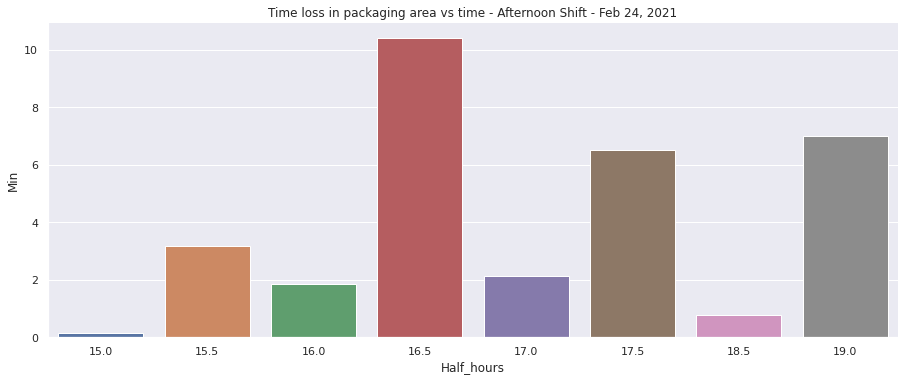

In [ ]:
#Plotting the number of minutes lost by each half hour and machine
sns.catplot(x='Half_hours', y='Min', data=pkl, kind='bar', height=5.0, aspect=2.5, ci=False, estimator=sum)
plt.title('Time loss in packaging area vs time - Afternoon Shift - Feb 24, 2021')
plt.show()

In [ ]:
#Groupying by Machine and Time loss
round(pkl[['Machine', 'Min']].groupby(['Machine']).sum().sort_values('Machine', ascending=False), 2)

,Min
Machine,
PKM3,20.65
PKM2,11.41


In [ ]:
#Groupying by Half_hour, Machine and Time loss
round(pkl[['Half_hours', 'Machine', 'Min']].groupby(['Half_hours', 'Machine'], sort=False).sum(), 2)

Min
Half_hours Machine      
15.0       PKM3     0.16
15.5       PKM3     3.17
16.0       PKM2     1.39
           PKM3     0.47
16.5       PKM3     7.29
           PKM2     3.12
17.0       PKM3     1.95
           PKM2     0.19
17.5       PKM3     1.93
           PKM2     4.60
18.5       PKM3     0.79
19.0       PKM3     4.89
           PKM2     2.11

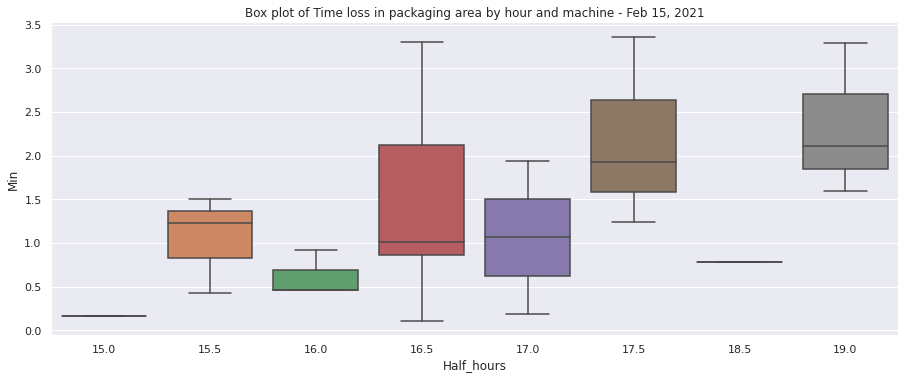

In [ ]:
#Plotting the variability of each machine
sns.catplot(x='Half_hours', y='Min', data=pkl, kind='box', height=5.0, aspect=2.5, ci=False, estimator=sum)
plt.title('Box plot of Time loss in packaging area by hour and machine - Feb 15, 2021')
plt.show()

In [ ]:
pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Event       23 non-null     int64         
 1   Machine     23 non-null     object        
 2   Start       23 non-null     datetime64[ns]
 3   Stop        23 non-null     datetime64[ns]
 4   Min         23 non-null     float64       
 5   Minute      23 non-null     int64         
 6   Hour        23 non-null     int64         
 7   Half_hours  23 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 1.6+ KB


# Packaging parts analysis

## Uploading packages and data

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
#Remove previous versions of the uploaded excel file
!rm xxxxxxxxxxxxx.xlsx

In [ ]:
#Upload file from local disk
from google.colab import files
upload = files.upload()

Saving hoved_deler_autowrapper.xlsx to hoved_deler_autowrapper.xlsx


In [ ]:
#Save uploaded file to a pandas dataframe
import io
df = pd.read_excel(io.BytesIO(upload['hoved_deler_autowrapper.xlsx']), index_col='Deler') # ==> Set Parts column as index

In [ ]:
#Fill missing values with np.nan
df = df.fillna(value=np.nan)

In [ ]:
#Checking the dataframe head
df.head()

,Ristebord_1,Ristebord_2,Agitator,Matelinje,Kontrollsystem,Biter_venstre_ligning,Biter_topp_ligning,Folie_mating,Folie_merking,Folie_rulling,Folie_kutting,Folie_liming,Folietransport,Skyv_biter_opp,Ruller_innbretter_ruller,Ruller_utmating,Flexlink
Deler,,,,,,,,,,,,,,,,,
1,Ristebord_1_motor,Ristebord_2_motor,Agitator_motor_1,Matelinje_motor,Hovedpanel,Venstre_ligning_motor,Topp_ligning_motor,Folie_motor,Merkesystem,Folierullende_motor,Folie_kniv,Liming_maskin,Klippebord,Skyv_opp_motor,Pakkemotor,Utmating_motor,Flexlink_motor
2,Ristebord_1_sensor,NaN,Agitator_motor_2,Renne,Stemplepanel,Venstre_stempel,Metal_skyver,Folie_sensor,Merkesensor,Folierullende_sensor,NaN,Liming_slange,Klippekjede,Gaffel,Pakkehode,Utmating_bånd,Flexlink_kjede
3,NaN,NaN,Agitator_sensor,Spylekjede,Limpanel,NaN,NaN,Folie_spole,NaN,Folierullende,NaN,Limdyse,Klippebord_sensor,NaN,Pakkebånd,NaN,NaN
4,NaN,NaN,Emergency_stop,NaN,NaN,NaN,NaN,NaN,NaN,Foliebord,NaN,NaN,Klippemotor,NaN,Innbretter_venstre,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Klipp_1,NaN,Innbretter_høyre,NaN,NaN


## Generating dictionary from List of parts

In [89]:
my_dict = {'Agitator': ['Emergency_stop', 'Agitator_sensor', 'nan', 'nan'],
           'Biter_topp_ligning': ['Metal_skyver', 'nan', 'nan'],
           'Biter_venstre_ligning': ['Venstre_stempel', 'Venstre_ligning_motor', 'nan', 'nan', 'nan'],
           'Flexlink': ['Flexlink_kjede', 'Flexlink_motor', 'nan']}

In [90]:
my_dict

{'Agitator': ['Emergency_stop', 'Agitator_sensor', 'nan', 'nan'],
 'Biter_topp_ligning': ['Metal_skyver', 'nan', 'nan'],
 'Biter_venstre_ligning': ['Venstre_stempel',
  'Venstre_ligning_motor',
  'nan',
  'nan',
  'nan'],
 'Flexlink': ['Flexlink_kjede', 'Flexlink_motor', 'nan']}

In [91]:
#Building a dictionary from columns, ignoring missing values
#my_dict = df.to_dict(orient='list')
clean_dict = {k: [val for val in l if str(val) != 'nan'] for k, l in my_dict.items()}
clean_dict

{'Agitator': ['Emergency_stop', 'Agitator_sensor'],
 'Biter_topp_ligning': ['Metal_skyver'],
 'Biter_venstre_ligning': ['Venstre_stempel', 'Venstre_ligning_motor'],
 'Flexlink': ['Flexlink_kjede', 'Flexlink_motor']}

In [84]:
my_dict

{None}

In [ ]:
type(my_dict['Agitator'][4])

float

In [ ]:
#Option 1: Create a function to locate and return a value from the dataframe
def df_to_dict(df, arg1, arg2):
  return df.xs(arg1, axis=0, level=None)[arg2].to_dict()

my_dict = df_to_dict(df, 'Melkerull 10 Kg', 'Freia 148G Milk Roll 2 Pack')
#print(f'Kode = {kode}, Group = {group}, Time = {value}min')

for (kode, group), v in my_dict.items():
  print(kode, group, v)

78604 Massive 20.0


In [ ]:
#Download the file
from google.colab import files
my_dict.to_excel('dictionary_parts.xlsx', index=True)
files.download('dictionary_parts.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame to a file on the Colab backend.
with open('df.json', 'w') as f:
  f.write(df.to_json())

In [ ]:
#Download the file
from google.colab import files
files.download('df.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_json?

In [ ]:
df.to_dict?

In [ ]:
pd.read_excel?